In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5], [0.5, 1]],
    size = num_samples_per_class

)


In [7]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [10]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                    np.ones((num_samples_per_class, 1), dtype = 'float32')))

In [ ]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

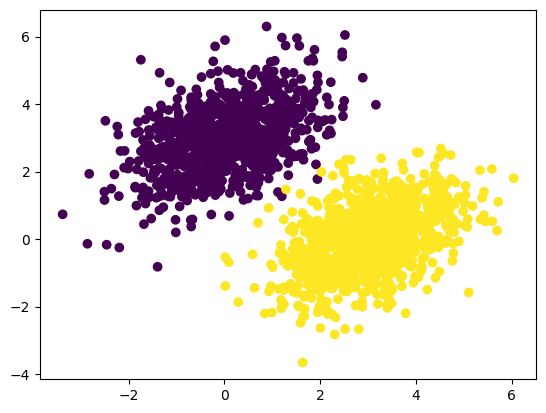

In [19]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value = tf.random.uniform(shape =(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim, )))

In [20]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [21]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [22]:
learning_rate = .1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 1.1636<br>
loss at step 1: 0.2403<br>
loss at step 2: 0.1191<br>
loss at step 3: 0.0986<br>
loss at step 4: 0.0913<br>
loss at step 5: 0.0859<br>
loss at step 6: 0.0811<br>
loss at step 7: 0.0768<br>
loss at step 8: 0.0727<br>
loss at step 9: 0.0690<br>
loss at step 10: 0.0656<br>
loss at step 11: 0.0625<br>
loss at step 12: 0.0596<br>
loss at step 13: 0.0569<br>
loss at step 14: 0.0545<br>
loss at step 15: 0.0522<br>
loss at step 16: 0.0501<br>
loss at step 17: 0.0482<br>
loss at step 18: 0.0465<br>
loss at step 19: 0.0448<br>
loss at step 20: 0.0433<br>
loss at step 21: 0.0420<br>
loss at step 22: 0.0407<br>
loss at step 23: 0.0395<br>
loss at step 24: 0.0384<br>
loss at step 25: 0.0374<br>
loss at step 26: 0.0365<br>
loss at step 27: 0.0357<br>
loss at step 28: 0.0349<br>
loss at step 29: 0.0342<br>
loss at step 30: 0.0335<br>
loss at step 31: 0.0329<br>
loss at step 32: 0.0324<br>
loss at step 33: 0.0319<br>
loss at step 34: 0.0314<br>
loss at step 35: 0.0309<br>
loss at step 36: 0.0305<br>
loss at step 37: 0.0302<br>
loss at step 38: 0.0298<br>
loss at step 39: 0.0295<br>

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)
plt.show()

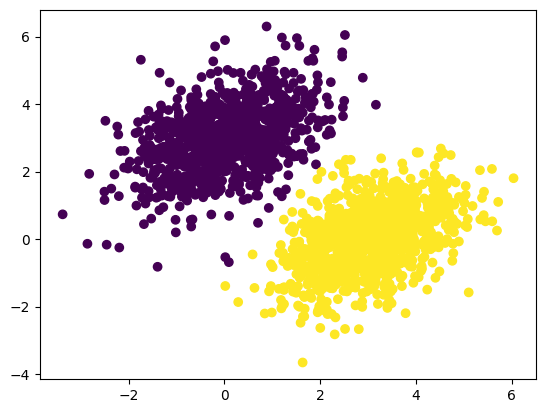

In [ ]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:, 1], c = predictions[:,0] > 0.5)

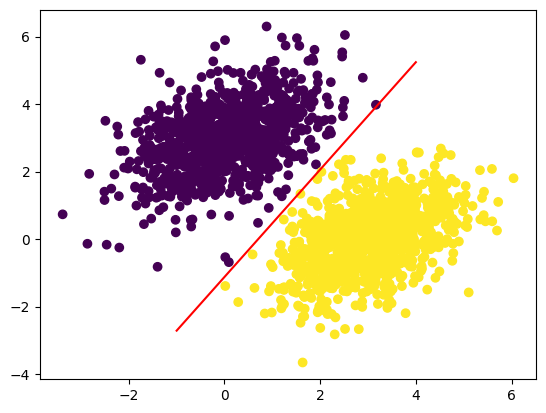